<a href="https://colab.research.google.com/github/baldpanda/dog_breed_classifier/blob/predict-breed-of-random-image-in-training/dog_breed_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dog Breed Classification

Playing with TensorFlow and Neural Networks to build a classifier to predict the breed given an image of a dog. The source of the dataset was Kaggle and the competition related to this task can be found [here](https://www.kaggle.com/c/dog-breed-identification). Storing the training data on Google Drive for easy integration with colab. Using Colab to take advantage of the compute power and I'm not sure my current laptop could cope with this task.

In [15]:
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from google.colab import drive
from PIL import Image
import random
print(tf.VERSION)

1.13.1


In [0]:
LABELS_PATH = '/content/drive/My Drive/dog_breed_classification/dog_breeds'
ST_BERNARD_SAMPLE_IMAGE_PATH = LABELS_PATH + '/saint_bernard/1b26fc0e227488f288c753c84a88ca6c.jpg'
MODEL_PATH = '/content/drive/My Drive/dog_breed_classification/model_test_one_epoch.h5'

Loading in training data from Google Drive.

In [3]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
st_bernard_image = Image.open(ST_BERNARD_SAMPLE_IMAGE_PATH)

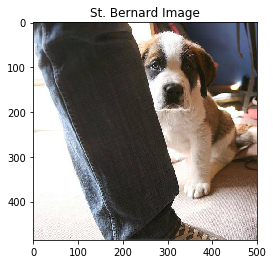

In [5]:
plt.imshow(st_bernard_image)
plt.title("St. Bernard Image")
plt.show()

Using  Keras's ImageDataGenerator to label the images of dogs for training a CNN

In [0]:
train_data_generator = ImageDataGenerator(rescale = 1/255)

In [0]:
train_generator = train_data_generator.flow_from_directory(
    LABELS_PATH,
    target_size=(300,300),
    batch_size=269,
    class_mode='sparse'
)

Found 10222 images belonging to 120 classes.


In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(120, activation='softmax')
])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Running for 1 epoch to test saving of model into and loading from Google Drive.

In [0]:
# history = model.fit_generator(train_generator, steps_per_epoch=38, epochs=1, verbose=2)

 - 3374s - loss: 4.9193 - acc: 0.0137


In [0]:
# model.save("/content/drive/My Drive/dog_breed_classification/model_test_one_epoch.h5")

In [6]:
model = tf.keras.models.load_model(MODEL_PATH)

Instructions for updating:
Colocations handled automatically by placer.


## Testing one epoch model on training image of St. Bernard shown previously

In [0]:
# reshaping and normalizing image to same format as training data
st_bernard_image_scaled = st_bernard_image.resize((300,300), Image.NEAREST)
np_st_bernard = np.array(st_bernard_image_scaled)
np_st_bernard = np_st_bernard / 255.0
np_st_bernard = np_st_bernard.reshape(1, 300, 300, 3)

In [0]:
# Extracting the dog breed labels from Google Drive
dog_breeds = os.listdir(LABELS_PATH)

In [9]:
predicted_breed = model.predict(np_st_bernard).argmax(axis=-1)[0]
dog_breeds[predicted_breed]

'brittany_spaniel'

## Creating a function to take image from training data at random and run model to make prediction

In [14]:
number_of_categories = len(dog_breeds)
print("The number of different breeds in the training data are {}.".format(number_of_categories))

The number of different breeds in the training data are 120.


In [22]:
# Picking dog at random from training data
rand_picked_breed = dog_breeds[random.randint(1,number_of_categories)]
print("The breed picked at random is {}".format(rand_picked_breed)).

The breed picked at random is chesapeake_bay_retriever


In [0]:
path_for_rand_breed = LABELS_PATH + "/" + rand_picked_breed
images_in_directory = os.listdir(path_for_rand_breed)
rand_picked_image = images_in_directory[random.randint(1, len(images_in_directory))]
rand_image_path = path_for_rand_breed + "/" + rand_picked_image
rand_picked_image = Image.open(rand_image_path)

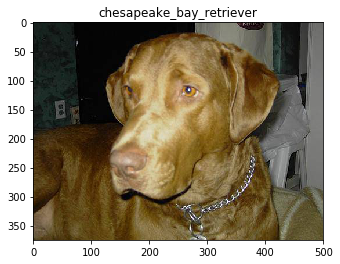

In [38]:
plt.imshow(rand_picked_image)
plt.title(rand_picked_breed)
plt.show()

In [0]:
rand_picked_image_scaled = rand_picked_image.resize((300, 300), Image.NEAREST)
np_rand_picked_image_scaled = np.array(rand_picked_image_scaled)
np_rand_picked_image_norm = np_rand_picked_image_scaled / 255.0
np_rand_picked_image_norm = np_rand_picked_image_norm.reshape(1, 300, 300, 3)

In [50]:
predicted_breed = dog_breeds[model.predict(np_rand_picked_image_norm).argmax(axis=-1)[0]]
print("Predicted breed of dog is {}, and the actual breed is {}.".format(predicted_breed, rand_picked_breed))

Predicted breed of dog is irish_wolfhound, and the actual breed is chesapeake_bay_retriever.


# Notes 

Machine interrupted whilst training. The first epoch took approx 3000 secs = 50 mins

=> The training would take 12.5 hours to train on standard machine. Having another go on a TPU enabled one (fingers crossed)

Also, on first epoch the model achieved an accuracy of just slightly better than guessing the same label (i.e. St. Bernard) for all the images